In [16]:
import kagglehub
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from collections import Counter
import re

from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from gensim.models import Word2Vec
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score



# Assignment 5 - CS 322 Data Science
## Text Exploration and Classification with Naive Bayes
Complete the tasks outlined in this python notebook.

### TASK 1: Load Training Dataset (3 points)
Acquire the dataset from the following link.

https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset Citation:

Andrew L. Maas, Raymond E. Daly, Peter T. Pham, Dan Huang, Andrew Y. Ng, and Christopher Potts. (2011). Learning Word Vectors for Sentiment Analysis. The 49th Annual Meeting of the Association for Computational Linguistics (ACL 2011).


In [3]:
# Download latest version
# Download the dataset from Kaggle
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

# Loading the current dataset
file_path = "C:\\Users\\kmtaw\\Downloads\\IMDB Dataset.csv"
data = pd.read_csv(file_path)
print("Unmodified Data Set:")
print(data.head())  # Printing the head of the unmodified dataset

Path to dataset files: C:\Users\kmtaw\.cache\kagglehub\datasets\lakshmi25npathi\imdb-dataset-of-50k-movie-reviews\versions\1
Unmodified Data Set:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


### TASK 2: Create a binary target column named "class" (2 points)
"negative" -> 0
"positive" -> 1

Hint: Use the apply function.

In [4]:
# Modify the dataset to include a binary column
df = data.copy()  # Copy data to preserve original dataset
df['CLASS'] = df['sentiment'].map({'negative': 0, 'positive': 1})  # Binarize 'sentiment' column
print("\nModified Data Set with Binarized Column:")
print(df.head())  # Preview modified dataset


Modified Data Set with Binarized Column:
                                              review sentiment  CLASS
0  One of the other reviewers has mentioned that ...  positive      1
1  A wonderful little production. <br /><br />The...  positive      1
2  I thought this was a wonderful way to spend ti...  positive      1
3  Basically there's a family where a little boy ...  negative      0
4  Petter Mattei's "Love in the Time of Money" is...  positive      1


### TASK 3: Explore the data (20 points)
Perform exploratory analysis on the text documents. You may reference other people's ideas and code, but must cite what you find.

Ideas to consider: Word Cloud, Most Common Words, etc.

Note that you may need to install and import additional libraries depending on what analysis you do.



In [5]:
# Load stopwords for preprocessing
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocessing(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    tokenization = word_tokenize(text.lower())  # Tokenize and lower case
    filtering = [word for word in tokenization if word.isalpha() and word not in stop_words]  # Filter out stopwords and non-alphabetic tokens
    return ' '.join(filtering)

df['processed_reviews'] = df['review'].apply(preprocessing)  # Apply preprocessing function to all reviews

# Separate Positive and Negative Reviews
positive_reviews = df[df['CLASS'] == 1]['processed_reviews'].tolist()
negative_reviews = df[df['CLASS'] == 0]['processed_reviews'].tolist()

Word Frequency Distribution for Positive Reviews:


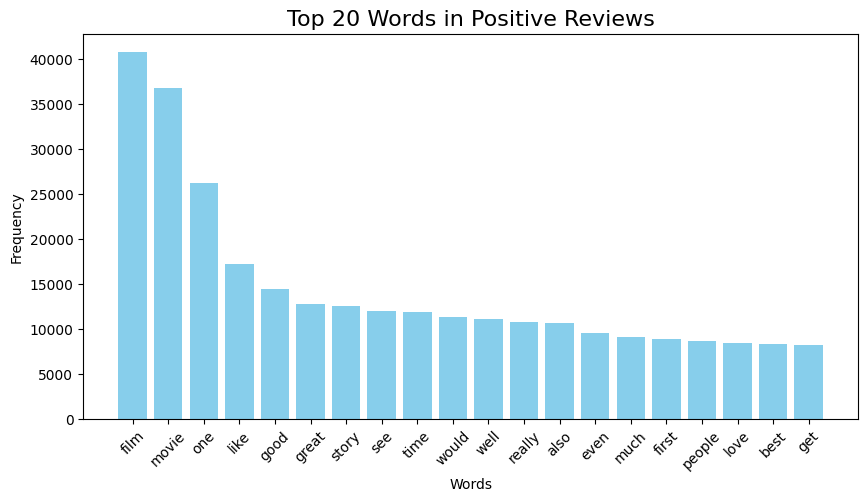

Word Frequency Distribution for Negative Reviews:


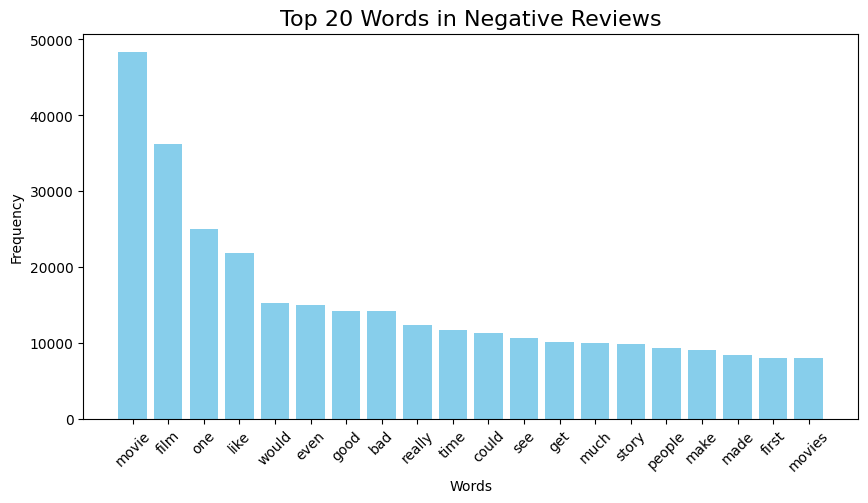

In [6]:
# Word Frequency Distribution
def plot_word_frequency(texts, title, top_n=20):
    all_words = ' '.join(texts).split()  # Combine all reviews into one string    
    word_counts = Counter(all_words)  # Count word frequencies
    common_words = word_counts.most_common(top_n)  # Get top N most common words
    words, counts = zip(*common_words)  # Unzip words and counts    
    # Plot bar chart
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts, color='skyblue')
    plt.title(title, fontsize=16)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

print("Word Frequency Distribution for Positive Reviews:")
plot_word_frequency(positive_reviews, 'Top 20 Words in Positive Reviews')

print("Word Frequency Distribution for Negative Reviews:")
plot_word_frequency(negative_reviews, 'Top 20 Words in Negative Reviews')


Bar Plot of Top 10 4-Grams in Positive Reviews:


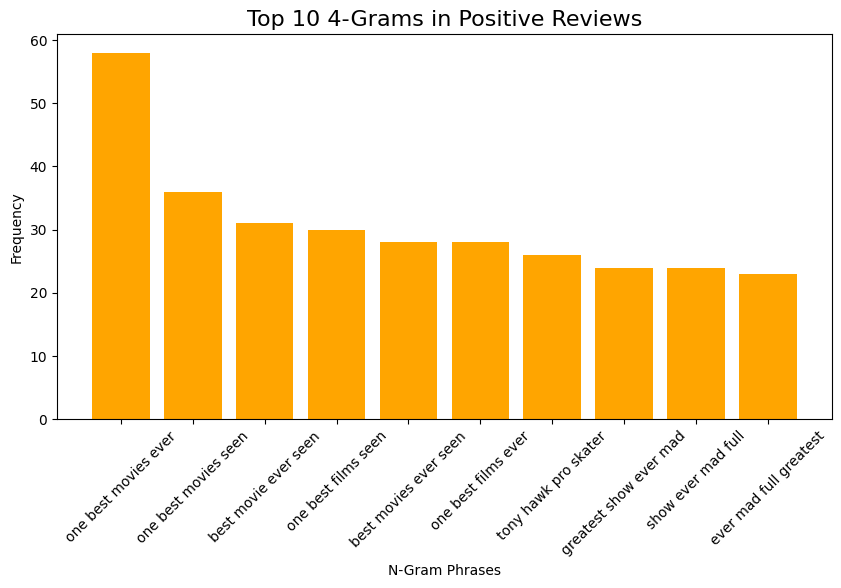


Bar Plot of Top 10 4-Grams in Negative Reviews:


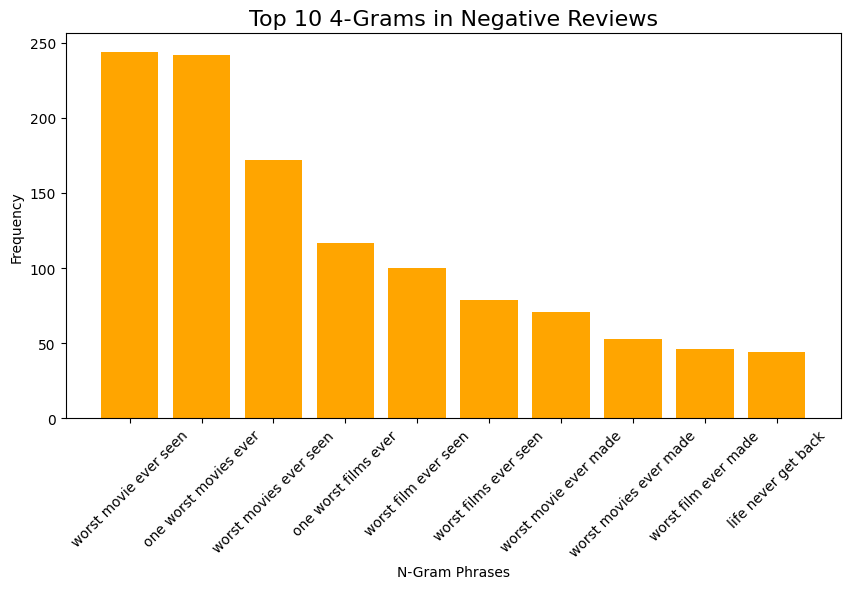

In [7]:
# Defining Function for N-Gram Analysis: Identifying 4-word phrases
def ngrams(texts, n=3, top_n=10):
    vectorizer = CountVectorizer(ngram_range=(n, n))  # Defines N-gram vectorizer
    ngram_matrix = vectorizer.fit_transform(texts)  # Transforms texts into N-grams
    ngram_counts = ngram_matrix.sum(axis=0).A1  # Adds up the occurrences of each N-gram
    ngram_words = vectorizer.get_feature_names_out()  # Get N-gram phrases
    ngram_freq = Counter(dict(zip(ngram_words, ngram_counts)))  # Create frequency dictionary
    return ngram_freq.most_common(top_n)  # Return the most common N-grams

# Applying the N-grams function to the dataset (4-grams as specified)
positive_fourgrams = ngrams(positive_reviews, n=4, top_n=10)
negative_fourgrams = ngrams(negative_reviews, n=4, top_n=10)

# Visualizing the occurrences of the N-Grams
def ngram_visualization(ngrams, title):
    phrases, counts = zip(*ngrams)  # Unzips N-gram phrases and their counts
    plt.figure(figsize=(10, 5))
    plt.bar(phrases, counts, color='orange')
    plt.title(title, fontsize=16)
    plt.xlabel('N-Gram Phrases')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Bar Plot for Top 10 4-Grams in Positive and Negative Reviews
print("\nBar Plot of Top 10 4-Grams in Positive Reviews:")
ngram_visualization(positive_fourgrams, 'Top 10 4-Grams in Positive Reviews')

print("\nBar Plot of Top 10 4-Grams in Negative Reviews:")
ngram_visualization(negative_fourgrams, 'Top 10 4-Grams in Negative Reviews')
    

### TASK 4: Vectorize the Training Data (10 points)
Transform the raw text data into vectors. You are encouraged but not required to try complex options.

Simple Options:
1. Count Vectors
2. Binary Vectors
3. TFIDF Vectors

Example Complex Options:
1. Word2Vec (gensim.models.Word2Vec)
2. Transformers such as BERT and GPT 

Example References:
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
https://pypi.org/project/transformers/

In [8]:
# Function to preprocess and tokenize reviews
def preprocess_reviews(reviews):
    tokenized_reviews = []
    for review in reviews:
        tokenized = word_tokenize(review.lower())  # Lowercase and tokenize
        tokenized_reviews.append(tokenized)
    return tokenized_reviews

# Tokenize positive and negative reviews
positive_tokenized = preprocess_reviews(positive_reviews)
negative_tokenized = preprocess_reviews(negative_reviews)
all_tokenized_reviews = positive_tokenized + negative_tokenized  # Combine all reviews

# Train the Word2Vec model (100-dimensional vectors, context window size of 5, and parallelization with 4 workers)
word2vec_model = Word2Vec(sentences=all_tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

# Function to generate embeddings for a review
def embedding_gen(review_tokens, model):
    embeddings = []
    for word in review_tokens:
        if word in model.wv:
            embeddings.append(model.wv[word])
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(model.vector_size)

# Generate embeddings for reviews
positive_embeddings = [embedding_gen(tokens, word2vec_model) for tokens in positive_tokenized]
negative_embeddings = [embedding_gen(tokens, word2vec_model) for tokens in negative_tokenized]

# Combine embeddings into a single dataset
X_word2vec = np.array(positive_embeddings + negative_embeddings)
y = np.array([1] * len(positive_reviews) + [0] * len(negative_reviews))

# Vectorizing using TF-IDF
vectorizer = TfidfVectorizer(max_features=3000, ngram_range=(1, 3))
X_tfidf = vectorizer.fit_transform(positive_reviews + negative_reviews)

# Train-test split (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

### TASK 6: Train and Tune Models (10 points)
Train and tune multiple models (3+). Try out different vectors. Perform cross-validation to find the optimal model for each kind.

Example Models to Consider:
https://scikit-learn.org/stable/modules/naive_bayes.html

In [18]:
# Define models with class balance handling
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Linear SVC": LinearSVC(max_iter=1000, class_weight='balanced'),
    "Naïve Bayes": GaussianNB(),
}

# Hyperparameter grids
param_grids = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10, 1000],
        'solver': ['liblinear', 'lbfgs'],
        'class_weight': ['balanced', None]
    },      
    "Linear SVC": {
        'C': [0.01, 0.1, 1, 10],
        'class_weight': ['balanced', None],
    },
    "Naïve Bayes": {
        'var_smoothing': [1e-9, 1e-8, 1e-7]
    }
}

# Hyperparameter tuning using GridSearchCV
tuned_models = {}
for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}...")
    
    # If using Naïve Bayes, ensure that the input is dense
    if model_name == "Naïve Bayes":
        X_train_dense = X_train.toarray()  # Convert sparse matrix to dense array
    else:
        X_train_dense = X_train  # Keep as sparse for other models
    
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train_dense, y_train)  # Fit model to training data
    
    tuned_models[model_name] = grid_search.best_estimator_  # Store the best model
    
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best score for {model_name}: {grid_search.best_score_:.4f}")

# Evaluate the tuned models
print("Evaluating tuned models:\n")
for model_name, model in tuned_models.items():
    if model_name == "Naïve Bayes":
        X_test_dense = X_test.toarray()  # Convert test data to dense format for Naïve Bayes
    else:
        X_test_dense = X_test  # Use sparse for other models
    
    y_pred = model.predict(X_test_dense)  # Predict on test data
    
    print(f"{model_name} Results:")
    print(classification_report(y_test, y_pred))  # Display classification report
    
    # Cross-validation with StratifiedKFold
    print(f"{model_name} Cross-Validation:\n")
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    if model_name == "Naïve Bayes":
        scores = cross_val_score(model, X_tfidf.toarray(), y, cv=skf)  # Dense data for Naive Bayes
    else:
        scores = cross_val_score(model, X_tfidf, y, cv=skf)
   
    print(f"{model_name} Cross-Validation Accuracy: {np.mean(scores):.4f}")

Tuning hyperparameters for Logistic Regression...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for Logistic Regression: {'C': 1, 'class_weight': 'balanced', 'solver': 'lbfgs'}
Best score for Logistic Regression: 0.8816
Tuning hyperparameters for Linear SVC...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for Linear SVC: {'C': 0.1, 'class_weight': 'balanced'}
Best score for Linear SVC: 0.8815
Tuning hyperparameters for Naïve Bayes...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters for Naïve Bayes: {'var_smoothing': 1e-07}
Best score for Naïve Bayes: 0.8230
Evaluating tuned models:

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      5000
           1       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0

### TASK 7: Load, Explore, Preprocess, Vectorize Test Data (5 points)
Explore, preprocess, and vectorize the test data **using the exact same models as the training set**. 

The test dataset will be published after students all write their movie reviews.

In [24]:
import os
from nltk.stem import WordNetLemmatizer

# Define the path to the test data directory
reviews_path = 'C:\\Users\\kmtaw\\Downloads\\movie_reviews'

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Combined list for reviews and their corresponding labels
reviews = []
labels = []

# Load and preprocess the test data (assuming each file is a separate review)
for filename in os.listdir(reviews_path):
    if filename.endswith('.txt'):
        with open(os.path.join(reviews_path, filename), 'r', encoding='utf-8') as file:
            review = file.read()
            if 'positive' in filename.lower():
                reviews.append(review)
                labels.append(1)  # Positive review label
            elif 'negative' in filename.lower():
                reviews.append(review)
                labels.append(0)  # Negative review label

# Function to preprocess each review
def preprocess_review(review):
    # Lowercase text
    review = review.lower()
    
    # Remove non-alphabetic characters and punctuation
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    
    # Tokenize the review, remove stopwords, and lemmatize
    tokens = review.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    # Return the processed text as a space-separated string
    return ' '.join(tokens)

# Preprocess all reviews
processed_reviews = [preprocess_review(review) for review in reviews]

# Vectorize the reviews (use the same vectorizer as for training)
vectorizer = TfidfVectorizer(max_features=3000, ngram_range=(1, 3))

# Fit the vectorizer on the training data (processed reviews)
X_train_tfidf = vectorizer.fit_transform(processed_reviews)

# Convert labels into a numpy array
y_train = np.array(labels)

# Here you can use the same vectorizer to transform any test data if needed
# Vectorizing the reviews using the same vectorizer
X_test_tfidf = vectorizer.transform(processed_reviews)

# Assuming the best model from tuning is available
best_model = tuned_models['Logistic Regression']  # Example: Logistic Regression as the best model

# Make predictions on the test data
test_predictions = best_model.predict(X_test_tfidf)

# Print predictions
print("Test Predictions:")
print(test_predictions)



Test Predictions:
[0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0]


### TASK 8: Test the Data and Analyze the Results (10 points)
For each model, compute accuracy, precision, recall, f1-score, and the confusion matrix. 

Compare the model performances based on performance on the testing.

Evaluating models on all reviews:

Evaluating Logistic Regression on all reviews...
Accuracy: 0.5000
Precision: 0.6400
Recall: 0.4324
F1-Score: 0.5161
Confusion Matrix:
[[14  9]
 [21 16]]


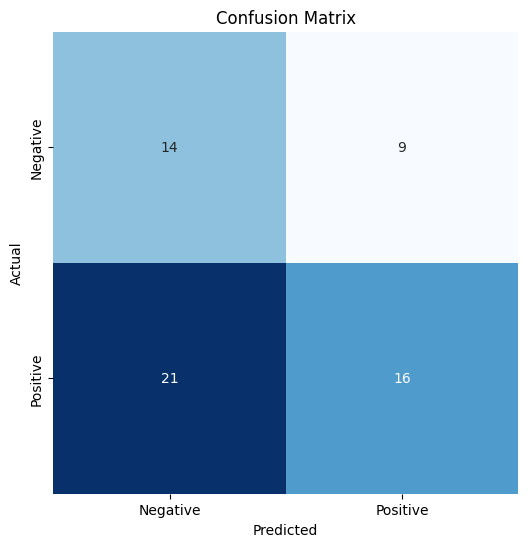


Evaluating Linear SVC on all reviews...
Accuracy: 0.5167
Precision: 0.6667
Recall: 0.4324
F1-Score: 0.5246
Confusion Matrix:
[[15  8]
 [21 16]]


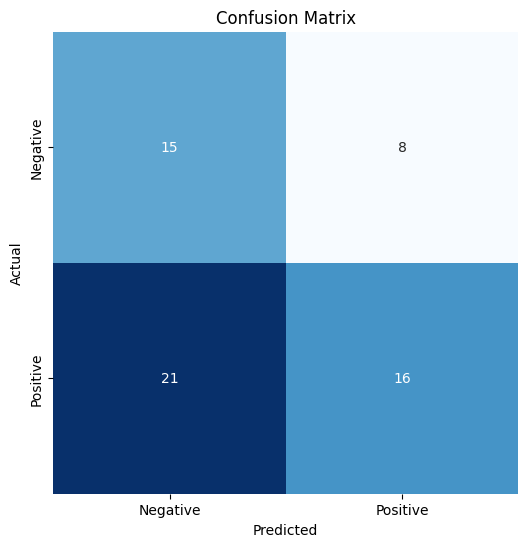


Evaluating Naïve Bayes on all reviews...
Accuracy: 0.5000
Precision: 0.6522
Recall: 0.4054
F1-Score: 0.5000
Confusion Matrix:
[[15  8]
 [22 15]]


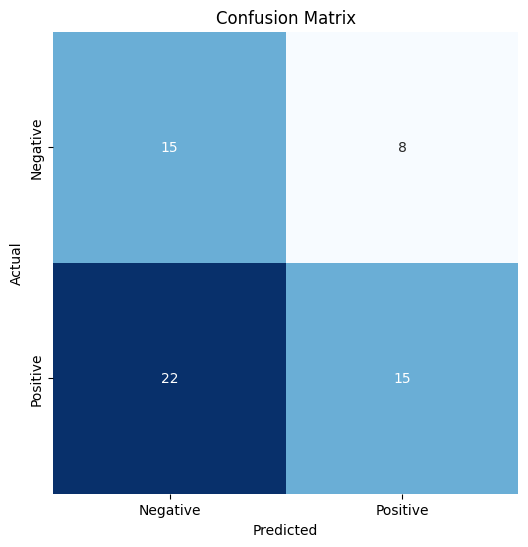

In [25]:
#Import necessary libraries for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Define the evaluation function
def evaluate_model(model, X_test, y_test):
    #Make predictions
    y_pred = model.predict(X_test)

    #Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    #Print out the evaluation results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    #Generate and display the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    #Visualize the confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
                xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

#Evaluate models on all reviews
print("Evaluating models on all reviews:")
for model_name, model in tuned_models.items():
    print(f"\nEvaluating {model_name} on all reviews...")
    #Check if the model is Naive Bayes, convert to dense if true
    if model_name == "Naïve Bayes":
        evaluate_model(model, X_test_tfidf.toarray(), y_train)  # Convert sparse matrix to dense
    else:
        evaluate_model(model, X_test_tfidf, y_train)